In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load in the dataset
df = pd.read_csv('/content/drive/MyDrive/Heart disease/heart.csv')

In [ ]:
# no. of rows & columns
df.shape

(1025, 14)

In [ ]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# checking the distribution of target variable
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

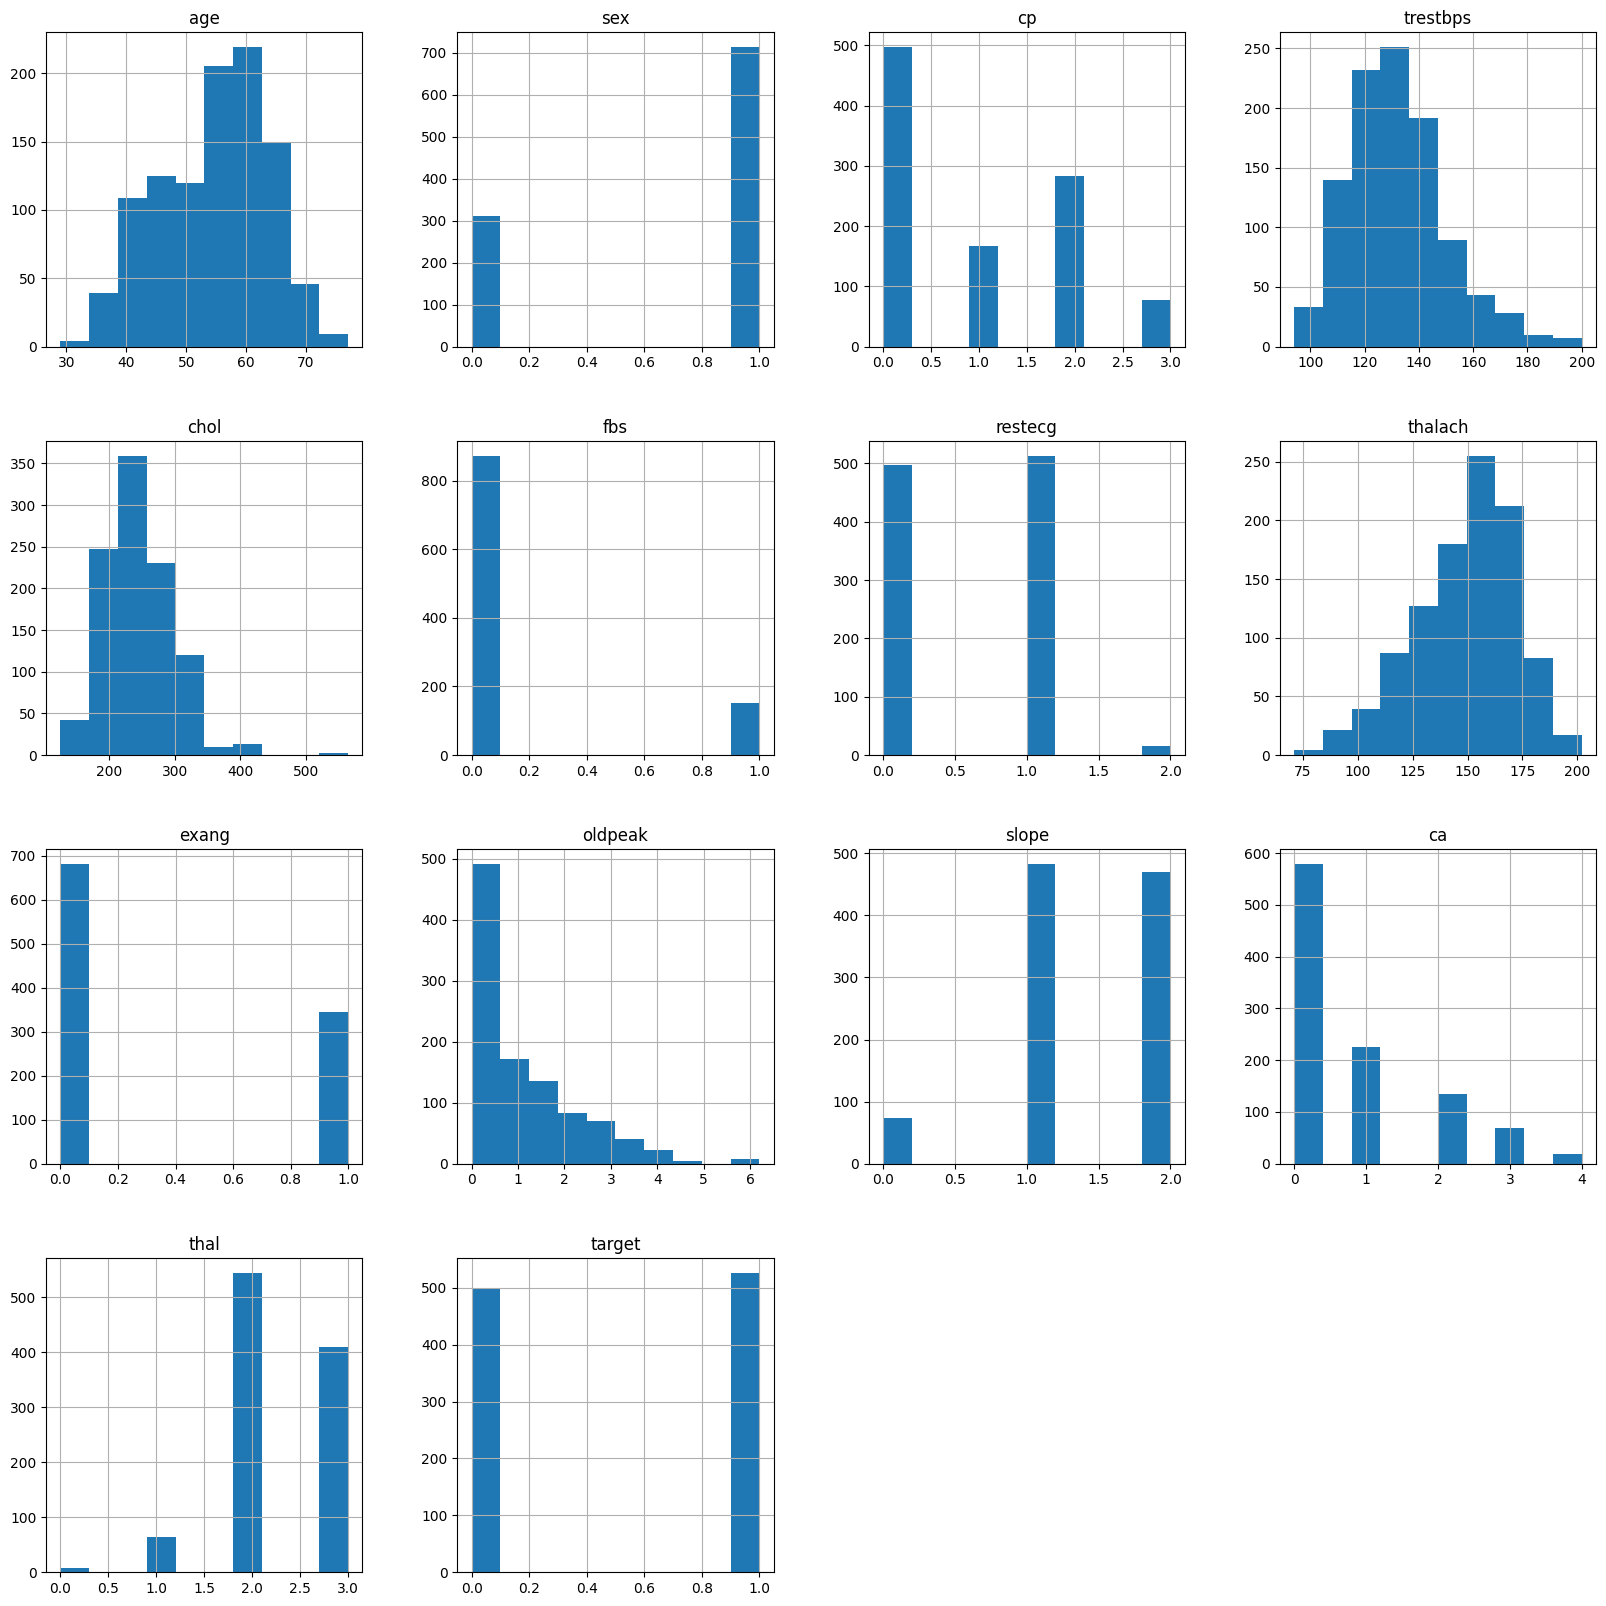

In [ ]:
p = df.hist(figsize = (20,20))

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)


# **Random** **Forest**

In [ ]:
rf = RandomForestClassifier(random_state=42, max_depth=5)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_train_preds = rf.predict_proba(X_train)[:, 1]
rf_test_preds = rf.predict_proba(X_test)[:, 1]
rf_train_fpr, rf_train_tpr, _ = roc_curve(y_train, rf_train_preds)
rf_test_fpr, rf_test_tpr, _ = roc_curve(y_test, rf_test_preds)
rf_train_auc = round(auc(rf_train_fpr, rf_train_tpr), 4)
rf_test_auc = round(auc(rf_test_fpr, rf_test_tpr), 4)

# **Naive Bayes**

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)
nb_train_preds = nb.predict_proba(X_train)[:, 1]
nb_test_preds = nb.predict_proba(X_test)[:, 1]
nb_train_fpr, nb_train_tpr, _ = roc_curve(y_train, nb_train_preds)
nb_test_fpr, nb_test_tpr, _ = roc_curve(y_test, nb_test_preds)
nb_train_auc = round(auc(nb_train_fpr, nb_train_tpr), 4)
nb_test_auc = round(auc(nb_test_fpr, nb_test_tpr), 4)

# **XGBoost**

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42, max_depth=5, learning_rate=0.001, n_estimators=1000, reg_lambda=0.01, reg_alpha=0.01, early_stopping_rounds=10)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
xgb_y_pred = xgb_model.predict(X_test)
xgb_train_preds = xgb_model.predict_proba(X_train)[:, 1]
xgb_test_preds = xgb_model.predict_proba(X_test)[:, 1]
xgb_train_fpr, xgb_train_tpr, _ = roc_curve(y_train, xgb_train_preds)
xgb_test_fpr, xgb_test_tpr, _ = roc_curve(y_test, xgb_test_preds)
xgb_train_auc = round(auc(xgb_train_fpr, xgb_train_tpr), 4)
xgb_test_auc = round(auc(xgb_test_fpr, xgb_test_tpr), 4)

# **Plotting ROC** **Curve**

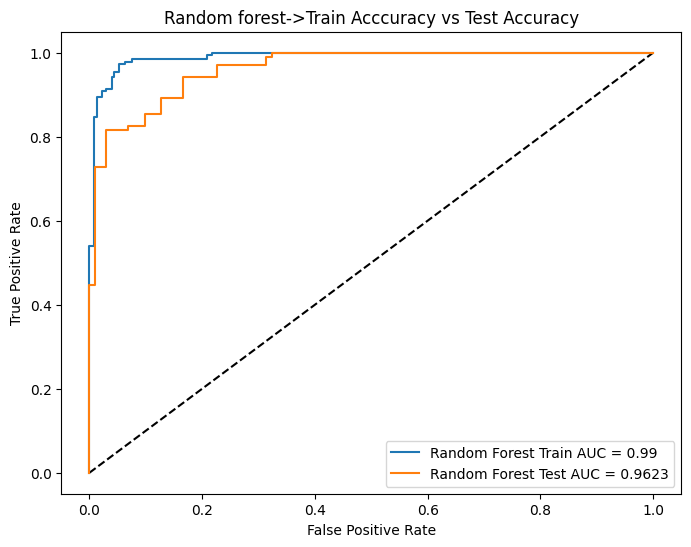

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rf_train_fpr, rf_train_tpr, label=f'Random Forest Train AUC = {rf_train_auc}')
plt.plot(rf_test_fpr, rf_test_tpr, label=f'Random Forest Test AUC = {rf_test_auc}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest->Train Acccuracy vs Test Accuracy')
plt.legend()
plt.show()

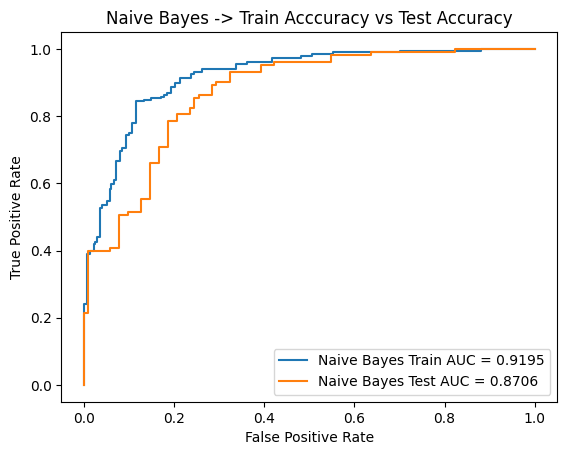

In [ ]:
plt.plot(nb_train_fpr, nb_train_tpr, label=f'Naive Bayes Train AUC = {nb_train_auc}')
plt.plot(nb_test_fpr, nb_test_tpr, label=f'Naive Bayes Test AUC = {nb_test_auc}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes -> Train Acccuracy vs Test Accuracy')
plt.legend()
plt.show()

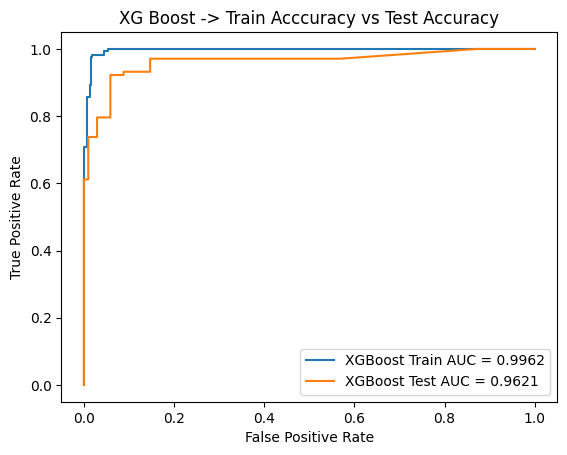

In [ ]:
plt.plot(xgb_train_fpr, xgb_train_tpr, label=f'XGBoost Train AUC = {xgb_train_auc}')
plt.plot(xgb_test_fpr, xgb_test_tpr, label=f'XGBoost Test AUC = {xgb_test_auc}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Boost -> Train Acccuracy vs Test Accuracy')
plt.legend()
plt.show()

# **Confusion** **Matrix**

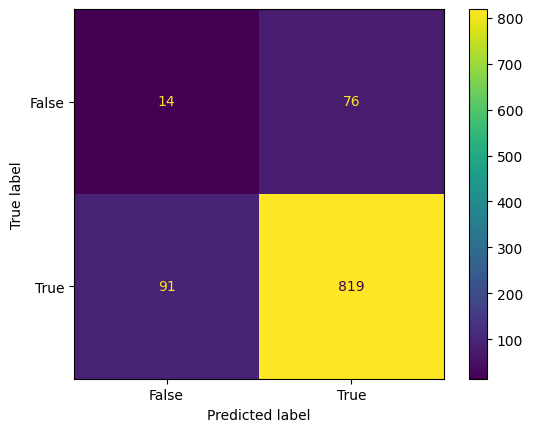

In [ ]:
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# **Calculation of Precision, Recall and F1** **Score**

In [ ]:
# calculation of precison, recall, f1score for Random forest
rf_precision = precision_score(y_test, rf_y_pred, average='macro')
rf_recall = recall_score(y_test, rf_y_pred, average='macro')
rf_f1score = f1_score(y_test, rf_y_pred, average='macro')

print("Random Forest Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(rf_precision, rf_recall, rf_f1score))


Random Forest Precision: 0.88, Recall: 0.87, F1-score: 0.87


In [ ]:
# calculation of precison, recall, f1score for Naive bayes
nb_precision = precision_score(y_test, nb_y_pred, average='macro')
nb_recall = recall_score(y_test, nb_y_pred, average='macro')
nb_f1score = f1_score(y_test, nb_y_pred, average='macro')

print("Naive Bayes Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(nb_precision, nb_recall, nb_f1score))

Naive Bayes Precision: 0.81, Recall: 0.80, F1-score: 0.80


In [ ]:
# calculation of precison, recall, f1score for XGBoost
xgb_precision = precision_score(y_test, xgb_y_pred, average='macro')
xgb_recall = recall_score(y_test, xgb_y_pred, average='macro')
xgb_f1score = f1_score(y_test, xgb_y_pred, average='macro')

print("XGBoost Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(xgb_precision, xgb_recall, xgb_f1score))

XGBoost Precision: 0.90, Recall: 0.90, F1-score: 0.90


# **Accuracy Comparision**

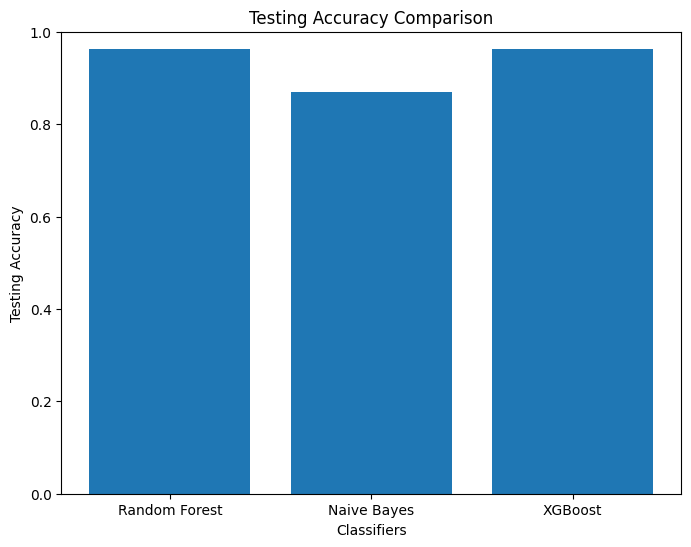

In [ ]:
classifiers = ['Random Forest', 'Naive Bayes', 'XGBoost']
test_accuracy = [rf_test_auc, nb_test_auc, xgb_test_auc]

plt.figure(figsize=(8, 6))
plt.bar(classifiers, test_accuracy)
plt.xlabel('Classifiers')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy Comparison')
plt.ylim(0, 1)  
plt.show()

# **Making a** **Prediction**

In [ ]:
data = np.array([[58, 0, 0, 100, 248, 0, 0, 122, 0, 1, 1, 0, 2]])
prediction = rf.predict(data)
print(prediction)

[1]


In [ ]:
data = np.array([[54, 1, 0, 122, 286, 0, 0, 116, 1, 3.2, 1, 2, 2]])
prediction = rf.predict(data)
print(prediction)

[0]
